Total anomalies detected: 14647
Sample anomalies:
        user  device_events_per_day_x  unique_pcs_per_day_x_x  \
6853      7                      2.0                     1.0   
6976      7                      6.0                     1.0   
22529    27                     18.0                     1.0   
22530    27                     18.0                     1.0   
22531    27                     16.0                     1.0   

       unique_filetrees_per_day_x  connect_events_per_day_x  \
6853                          2.0                       2.0   
6976                          2.0                       6.0   
22529                         2.0                      18.0   
22530                         2.0                      18.0   
22531                         2.0                      16.0   

       disconnect_events_per_day_x  external_path_access_per_day_x  \
6853                           1.0                             1.0   
6976                           3.0           

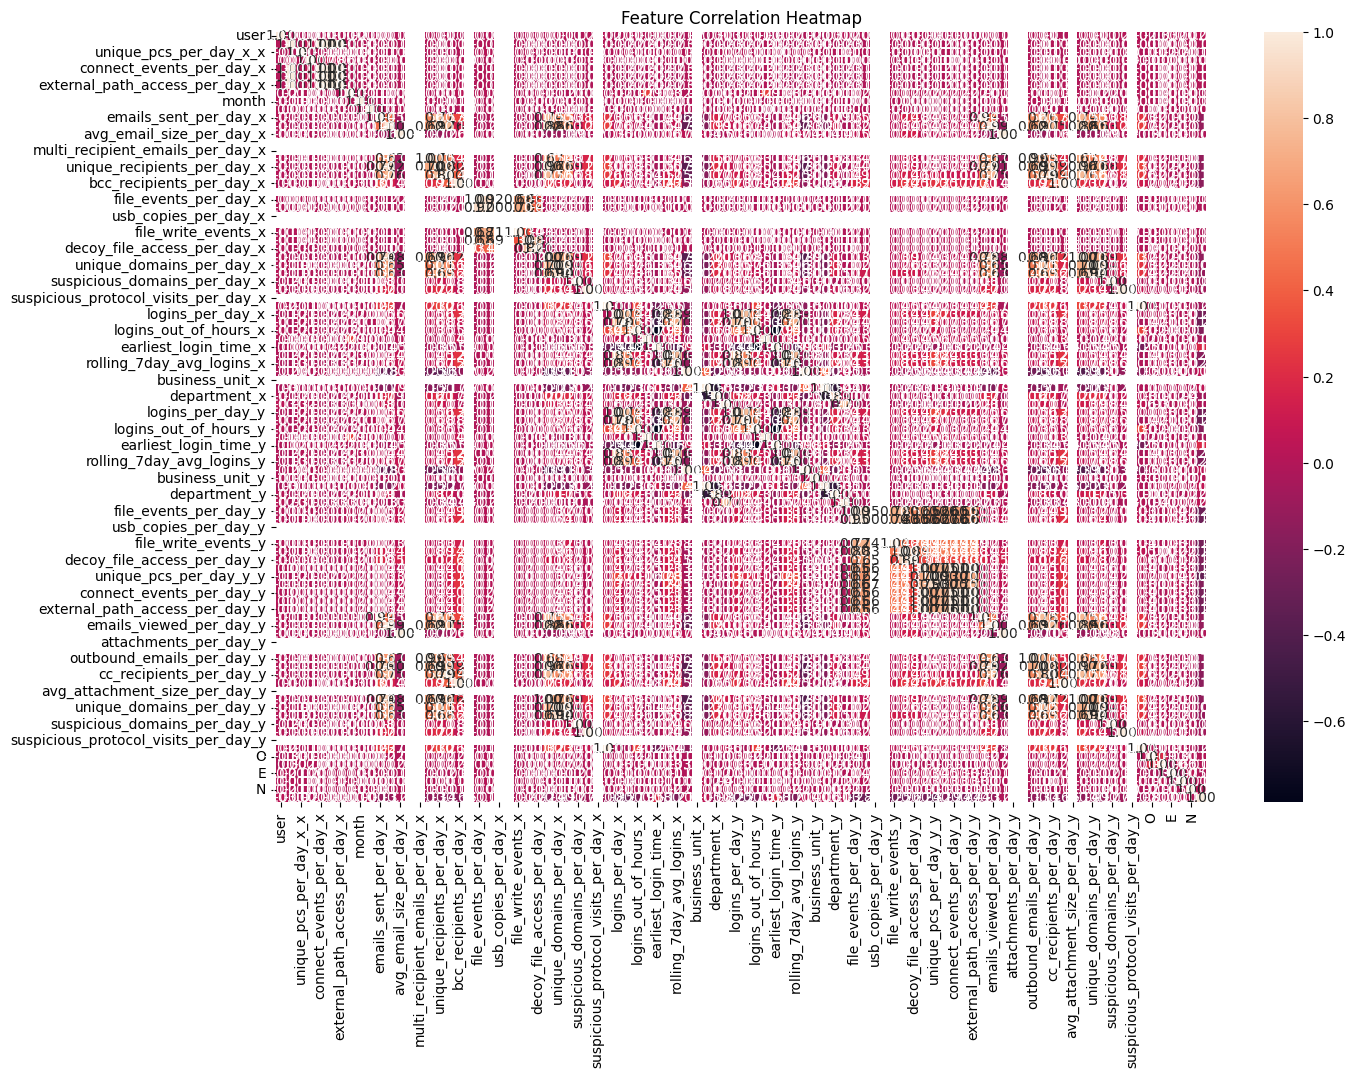

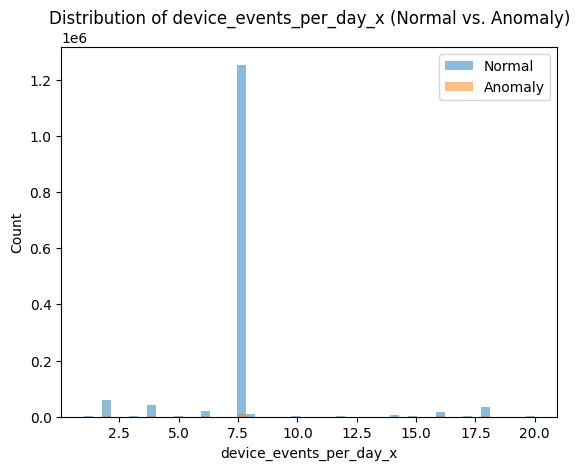

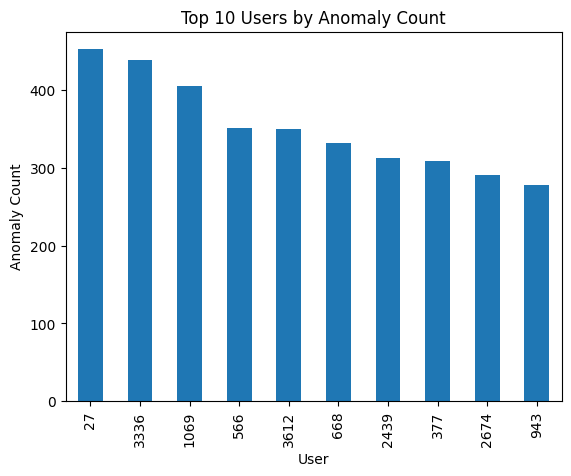

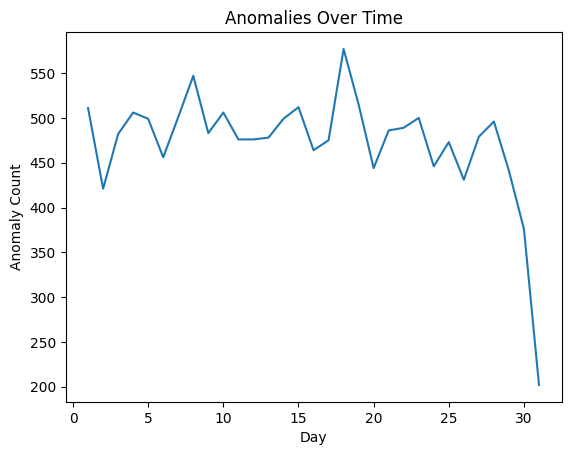

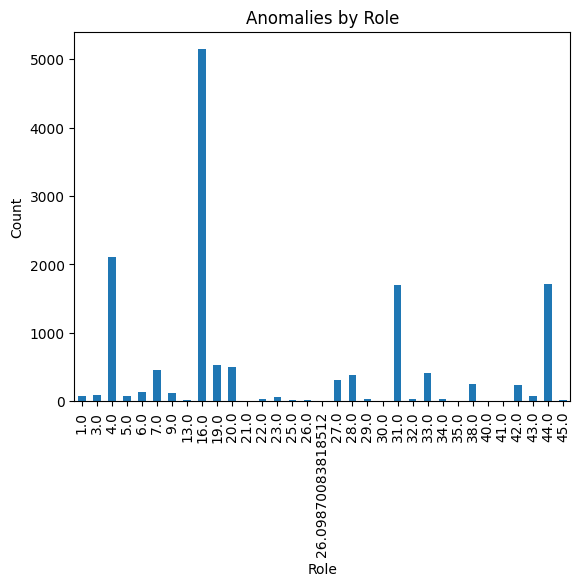

Anomalies exported for review.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\isolation_forest_results.csv')
anomalies = df[df['anomaly'] == -1]

print("Total anomalies detected:", len(anomalies))
print("Sample anomalies:\n", anomalies.head())
print("Top anomalous users:\n", anomalies['user'].value_counts().head(10))

# Statistical comparison for all features
for col in df.columns:
    if col not in ['anomaly', 'user']:
        print(f"\nNormal stats for {col}:\n", df[df['anomaly'] == 1][col].describe())
        print(f"Anomaly stats for {col}:\n", anomalies[col].describe())

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize feature distribution
feature = 'device_events_per_day_x'
plt.hist(df[df['anomaly'] == 1][feature], bins=50, alpha=0.5, label='Normal')
plt.hist(anomalies[feature], bins=50, alpha=0.5, label='Anomaly')
plt.legend()
plt.title(f'Distribution of {feature} (Normal vs. Anomaly)')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

# Visualize anomaly counts per user (top 10)
top_users = anomalies['user'].value_counts().head(10)
top_users.plot(kind='bar')
plt.title('Top 10 Users by Anomaly Count')
plt.xlabel('User')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies over time
anomalies['day'].value_counts().sort_index().plot()
plt.title('Anomalies Over Time')
plt.xlabel('Day')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies by role
anomalies.groupby('role_x').size().plot(kind='bar')
plt.title('Anomalies by Role')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

# Export anomalies for manual review
anomalies.to_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\anomalies_for_review.csv', index=False)
print("Anomalies exported for review.")

Original anomalies: 14647
High contamination anomalies: 73231
Overlap anomalies: 14614
New anomalies (only in high contamination): 58617


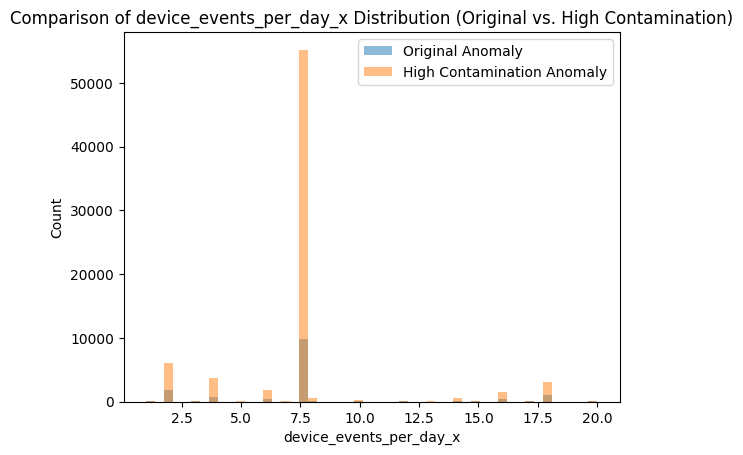

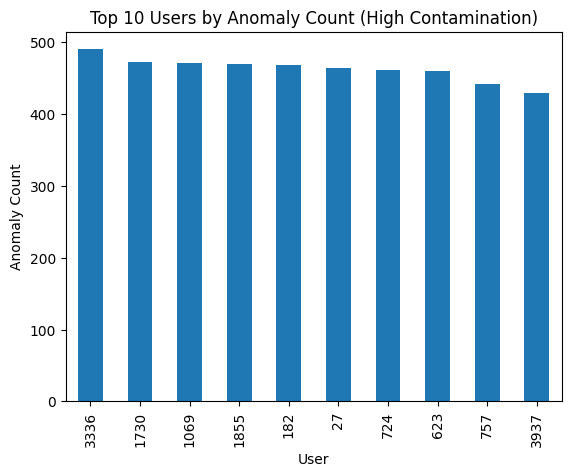

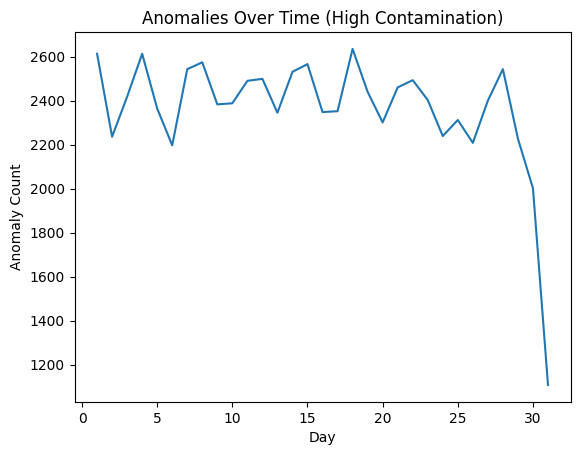

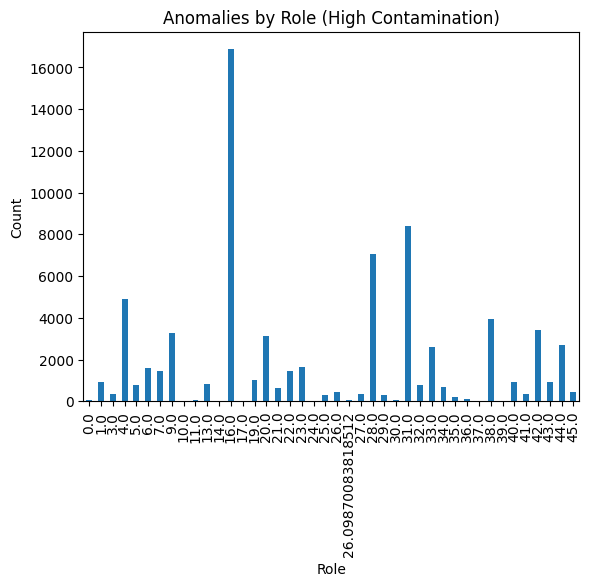

High contamination anomalies exported for review.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load results
df = pd.read_csv(r'C:\\Users\\karun\\OneDrive\\Documents\\RIK\\outputs\\final_outputs\\isolation_forest_results.csv')

# --- Retrain Isolation Forest with higher contamination and compare results ---

from sklearn.ensemble import IsolationForest

# Prepare feature columns (exclude non-feature columns)
feature_cols = [col for col in df.columns if col not in ['user', 'anomaly']]
X = df[feature_cols]

# Fit Isolation Forest with higher contamination (e.g., 0.05)
iso_forest_high = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_high_cont'] = iso_forest_high.fit_predict(X)

# Compare anomaly counts
print("Original anomalies:", (df['anomaly'] == -1).sum())
print("High contamination anomalies:", (df['anomaly_high_cont'] == -1).sum())

# Overlap and new anomalies
overlap = ((df['anomaly'] == -1) & (df['anomaly_high_cont'] == -1)).sum()
new_high = ((df['anomaly'] == 1) & (df['anomaly_high_cont'] == -1)).sum()
print("Overlap anomalies:", overlap)
print("New anomalies (only in high contamination):", new_high)

# Compare feature distribution for a key feature
feature = 'device_events_per_day_x'
plt.hist(df[df['anomaly'] == -1][feature], bins=50, alpha=0.5, label='Original Anomaly')
plt.hist(df[df['anomaly_high_cont'] == -1][feature], bins=50, alpha=0.5, label='High Contamination Anomaly')
plt.legend()
plt.title(f'Comparison of {feature} Distribution (Original vs. High Contamination)')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

# Top users by anomaly count (high contamination)
top_users_high = df[df['anomaly_high_cont'] == -1]['user'].value_counts().head(10)
top_users_high.plot(kind='bar')
plt.title('Top 10 Users by Anomaly Count (High Contamination)')
plt.xlabel('User')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies over time (high contamination)
df[df['anomaly_high_cont'] == -1]['day'].value_counts().sort_index().plot()
plt.title('Anomalies Over Time (High Contamination)')
plt.xlabel('Day')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies by role (high contamination)
df[df['anomaly_high_cont'] == -1].groupby('role_x').size().plot(kind='bar')
plt.title('Anomalies by Role (High Contamination)')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

# Export new anomalies for manual review
df[df['anomaly_high_cont'] == -1].to_csv(
    r'C:\\Users\\karun\\OneDrive\\Documents\\RIK\\outputs\\final_outputs\\anomalies_high_cont_for_review.csv',
    index=False
)
print("High contamination anomalies exported for review.")

Original anomalies: 14647
Medium contamination anomalies: 36616
Overlap anomalies: 14174
New anomalies (only in medium contamination): 22442


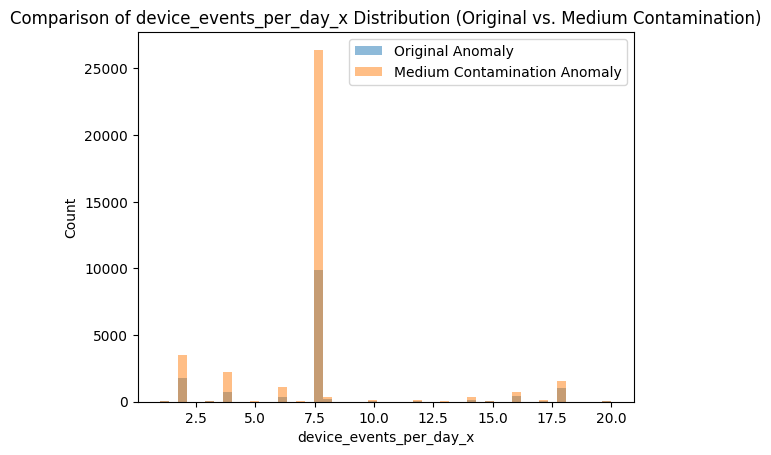

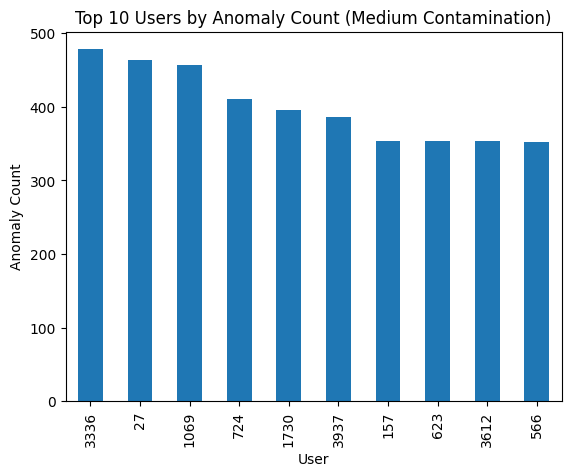

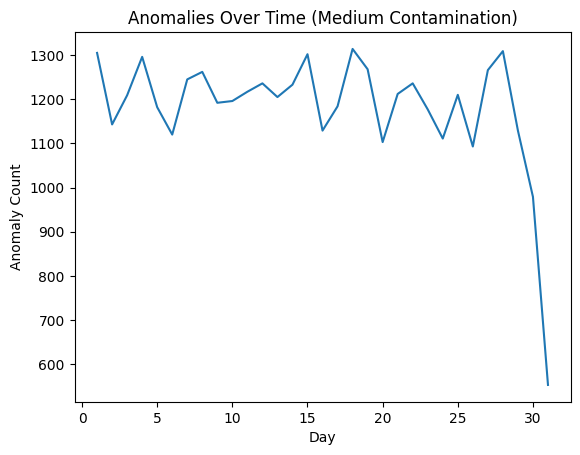

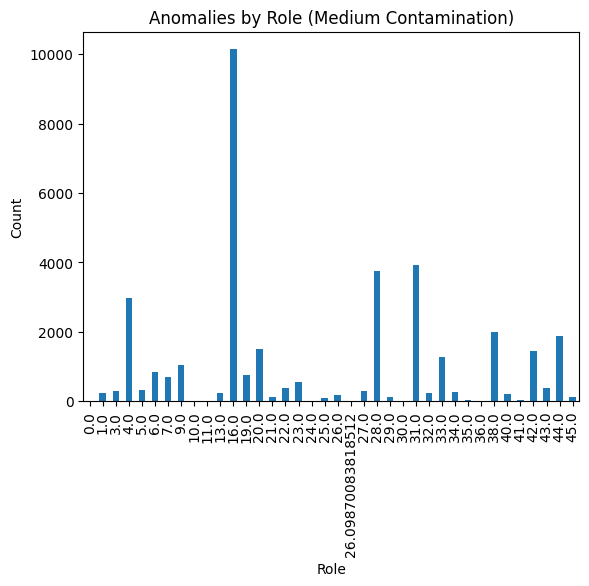

Medium contamination anomalies exported for review.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# --- Retrain Isolation Forest with contamination=0.025 and compare results ---

from sklearn.ensemble import IsolationForest

# Prepare feature columns (exclude non-feature columns)
feature_cols = [col for col in df.columns if col not in ['user', 'anomaly', 'anomaly_high_cont']]
X = df[feature_cols]

# Fit Isolation Forest with contamination=0.025
iso_forest_med = IsolationForest(contamination=0.025, random_state=42)
df['anomaly_med_cont'] = iso_forest_med.fit_predict(X)

# Compare anomaly counts
print("Original anomalies:", (df['anomaly'] == -1).sum())
print("Medium contamination anomalies:", (df['anomaly_med_cont'] == -1).sum())

# Overlap and new anomalies
overlap_med = ((df['anomaly'] == -1) & (df['anomaly_med_cont'] == -1)).sum()
new_med = ((df['anomaly'] == 1) & (df['anomaly_med_cont'] == -1)).sum()
print("Overlap anomalies:", overlap_med)
print("New anomalies (only in medium contamination):", new_med)

# Compare feature distribution for a key feature
feature = 'device_events_per_day_x'
plt.hist(df[df['anomaly'] == -1][feature], bins=50, alpha=0.5, label='Original Anomaly')
plt.hist(df[df['anomaly_med_cont'] == -1][feature], bins=50, alpha=0.5, label='Medium Contamination Anomaly')
plt.legend()
plt.title(f'Comparison of {feature} Distribution (Original vs. Medium Contamination)')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

# Top users by anomaly count (medium contamination)
top_users_med = df[df['anomaly_med_cont'] == -1]['user'].value_counts().head(10)
top_users_med.plot(kind='bar')
plt.title('Top 10 Users by Anomaly Count (Medium Contamination)')
plt.xlabel('User')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies over time (medium contamination)
df[df['anomaly_med_cont'] == -1]['day'].value_counts().sort_index().plot()
plt.title('Anomalies Over Time (Medium Contamination)')
plt.xlabel('Day')
plt.ylabel('Anomaly Count')
plt.show()

# Anomalies by role (medium contamination)
df[df['anomaly_med_cont'] == -1].groupby('role_x').size().plot(kind='bar')
plt.title('Anomalies by Role (Medium Contamination)')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

# Export new anomalies for manual review
df[df['anomaly_med_cont'] == -1].to_csv(
    r'C:\\Users\\karun\\OneDrive\\Documents\\RIK\\outputs\\final_outputs\\anomalies_med_cont_for_review.csv',
    index=False
)
print("Medium contamination anomalies exported for review.")

Medium contamination anomalies: 36616
High contamination anomalies: 73231
Overlap anomalies: 36616
Only in medium: 0
Only in high: 36615


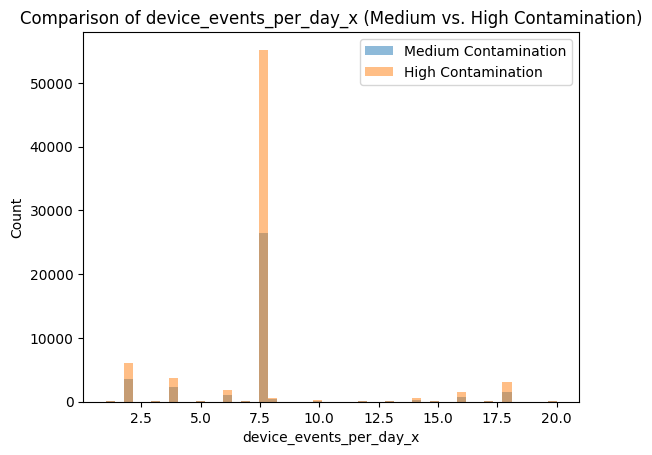

Top users (medium):
user
3336    478
27      463
1069    457
724     411
1730    396
3937    386
157     354
623     354
3612    353
566     352
Name: count, dtype: int64

Top users (high):
user
3336    490
1730    473
1069    471
1855    469
182     468
27      464
724     461
623     460
757     442
3937    429
Name: count, dtype: int64

Anomalies by role (medium):
role_x
16.000000    10139
31.000000     3938
28.000000     3763
4.000000      2987
38.000000     2004
44.000000     1886
20.000000     1522
42.000000     1464
33.000000     1279
9.000000      1052
6.000000       853
19.000000      750
7.000000       689
23.000000      560
43.000000      380
22.000000      373
5.000000       337
27.000000      305
3.000000       302
34.000000      269
1.000000       248
32.000000      241
13.000000      236
40.000000      223
26.000000      192
29.000000      139
21.000000      136
45.000000      116
25.000000      101
41.000000       48
35.000000       43
36.000000       12
11.000000      

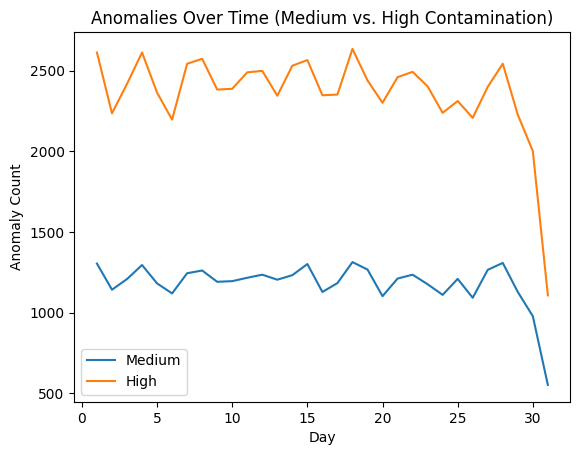

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# --- Compare medium (0.025) and high (0.05) contamination anomaly results ---

# 1. Compare anomaly counts
medium_count = (df['anomaly_med_cont'] == -1).sum()
high_count = (df['anomaly_high_cont'] == -1).sum()
print(f"Medium contamination anomalies: {medium_count}")
print(f"High contamination anomalies: {high_count}")

# 2. Overlap and unique anomalies
overlap = ((df['anomaly_med_cont'] == -1) & (df['anomaly_high_cont'] == -1)).sum()
only_medium = ((df['anomaly_med_cont'] == -1) & (df['anomaly_high_cont'] != -1)).sum()
only_high = ((df['anomaly_high_cont'] == -1) & (df['anomaly_med_cont'] != -1)).sum()
print(f"Overlap anomalies: {overlap}")
print(f"Only in medium: {only_medium}")
print(f"Only in high: {only_high}")

# 3. Feature distribution comparison
feature = 'device_events_per_day_x'
plt.hist(df[df['anomaly_med_cont'] == -1][feature], bins=50, alpha=0.5, label='Medium Contamination')
plt.hist(df[df['anomaly_high_cont'] == -1][feature], bins=50, alpha=0.5, label='High Contamination')
plt.legend()
plt.title(f'Comparison of {feature} (Medium vs. High Contamination)')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

# 4. Top users by anomaly count
print("Top users (medium):")
print(df[df['anomaly_med_cont'] == -1]['user'].value_counts().head(10))
print("\nTop users (high):")
print(df[df['anomaly_high_cont'] == -1]['user'].value_counts().head(10))

# 5. Anomalies by role
print("\nAnomalies by role (medium):")
print(df[df['anomaly_med_cont'] == -1]['role_x'].value_counts())
print("\nAnomalies by role (high):")
print(df[df['anomaly_high_cont'] == -1]['role_x'].value_counts())

# 6. Anomalies over time
df[df['anomaly_med_cont'] == -1]['day'].value_counts().sort_index().plot(label='Medium')
df[df['anomaly_high_cont'] == -1]['day'].value_counts().sort_index().plot(label='High')
plt.legend()
plt.title('Anomalies Over Time (Medium vs. High Contamination)')
plt.xlabel('Day')
plt.ylabel('Anomaly Count')
plt.show()

SHAP summary for original contamination anomalies:


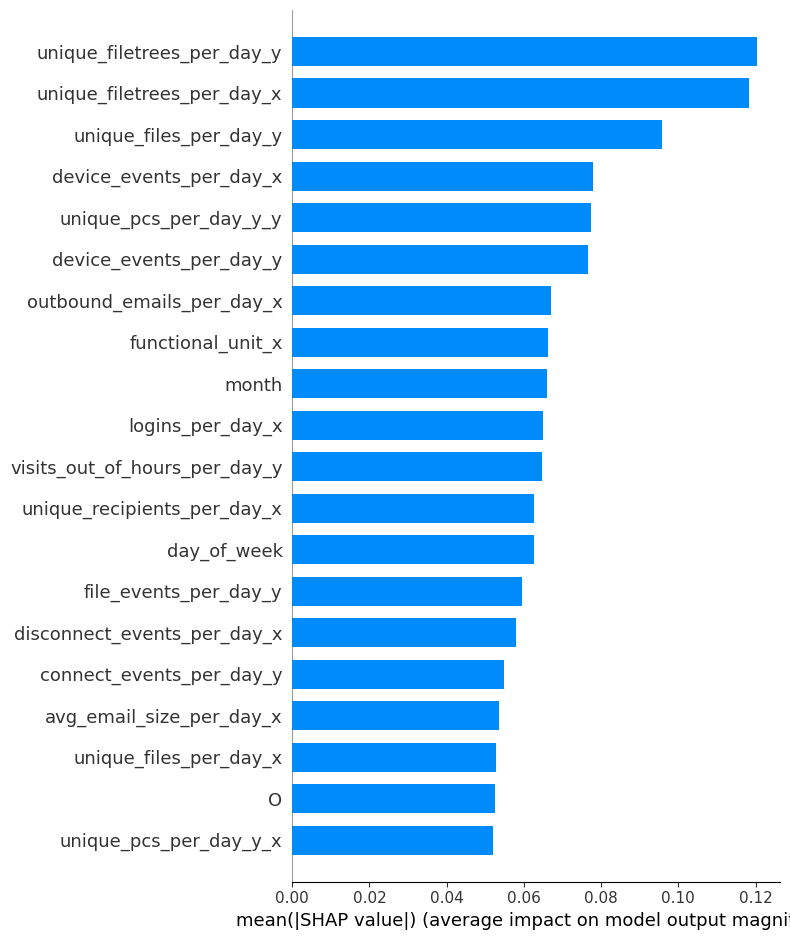

SHAP summary for medium contamination anomalies:


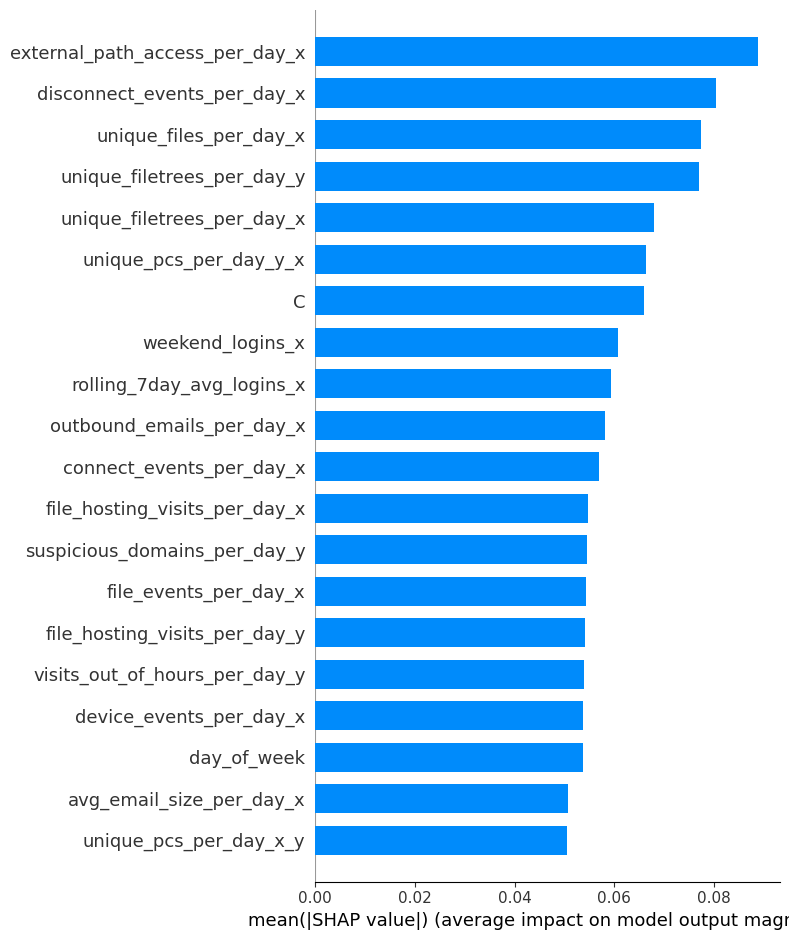

SHAP summary for high contamination anomalies:


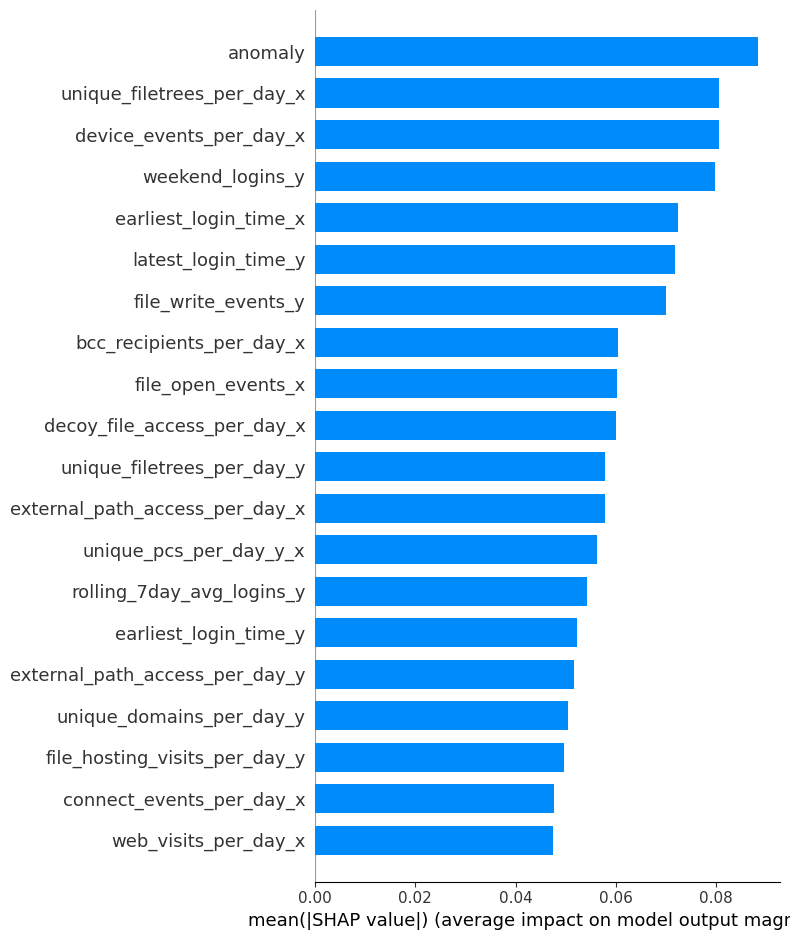

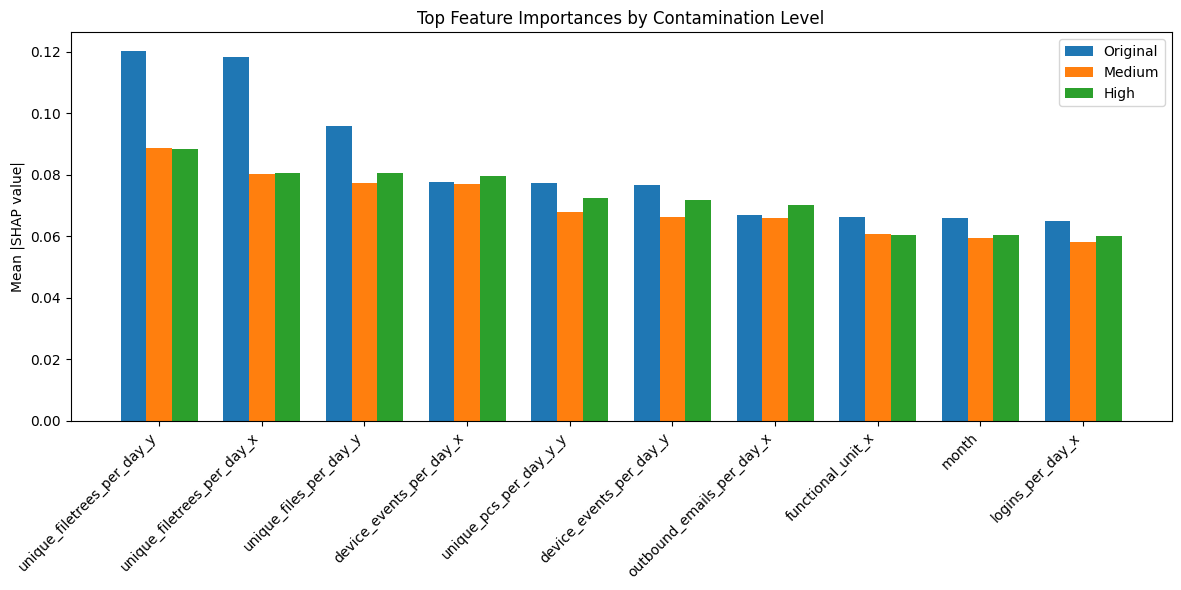

In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

# 1. Load each output file
df_orig = pd.read_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\isolation_forest_results.csv')
df_med = pd.read_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\anomalies_med_cont_for_review.csv')
df_high = pd.read_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\anomalies_high_cont_for_review.csv')

# 2. Prepare feature columns for each
feature_cols_orig = [col for col in df_orig.columns if col not in ['user', 'anomaly']]
feature_cols_med = [col for col in df_med.columns if col not in ['user', 'anomaly_med_cont']]
feature_cols_high = [col for col in df_high.columns if col not in ['user', 'anomaly_high_cont']]

X_orig = df_orig[feature_cols_orig]
X_med = df_med[feature_cols_med]
X_high = df_high[feature_cols_high]

# 3. Fit models for each contamination level (if not already available)
iso_forest_orig = IsolationForest(contamination=0.01, random_state=42).fit(X_orig)
iso_forest_med = IsolationForest(contamination=0.025, random_state=42).fit(X_med)
iso_forest_high = IsolationForest(contamination=0.05, random_state=42).fit(X_high)

# 4. SHAP explainers and values
explainer_orig = shap.TreeExplainer(iso_forest_orig)
shap_values_orig = explainer_orig.shap_values(X_orig)

explainer_med = shap.TreeExplainer(iso_forest_med)
shap_values_med = explainer_med.shap_values(X_med)

explainer_high = shap.TreeExplainer(iso_forest_high)
shap_values_high = explainer_high.shap_values(X_high)

# 5. SHAP summary plots for all three
print("SHAP summary for original contamination anomalies:")
shap.summary_plot(shap_values_orig, X_orig, plot_type="bar", show=True)

print("SHAP summary for medium contamination anomalies:")
shap.summary_plot(shap_values_med, X_med, plot_type="bar", show=True)

print("SHAP summary for high contamination anomalies:")
shap.summary_plot(shap_values_high, X_high, plot_type="bar", show=True)

# 6. Compare feature importances side by side
def get_shap_importance(shap_values, X, top_n=10):
    mean_abs = np.abs(shap_values).mean(axis=0)
    indices = np.argsort(mean_abs)[::-1][:top_n]
    return X.columns[indices], mean_abs[indices]

top_n = 10
features_orig, importances_orig = get_shap_importance(shap_values_orig, X_orig, top_n)
features_med, importances_med = get_shap_importance(shap_values_med, X_med, top_n)
features_high, importances_high = get_shap_importance(shap_values_high, X_high, top_n)

plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(top_n)

plt.bar(x, importances_orig, width=bar_width, label='Original')
plt.bar(x + bar_width, importances_med, width=bar_width, label='Medium')
plt.bar(x + 2*bar_width, importances_high, width=bar_width, label='High')
plt.xticks(x + bar_width, features_orig, rotation=45, ha='right')
plt.ylabel('Mean |SHAP value|')
plt.title('Top Feature Importances by Contamination Level')
plt.legend()
plt.tight_layout()
plt.show()

Top 10 anomalous users for anomaly:
user
27      452
3336    438
1069    405
566     351
3612    350
668     332
2439    312
377     309
2674    291
943     278
Name: count, dtype: int64
Exported details to top_anomalous_users_anomaly.csv


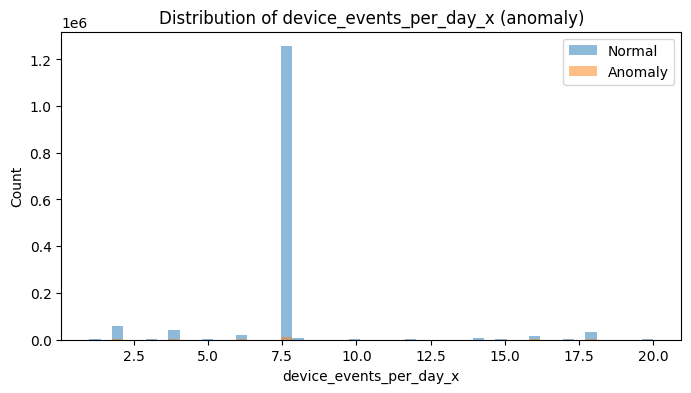

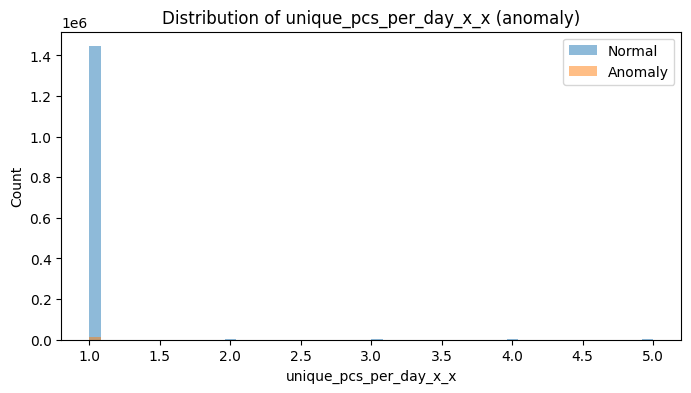

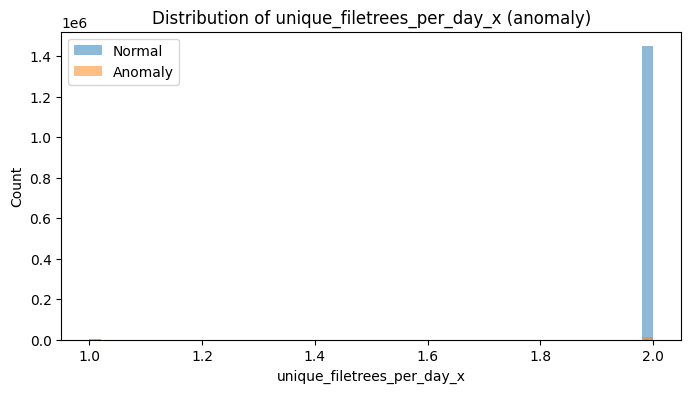

Top 10 anomalous users for anomaly_med_cont:
user
3336    478
27      463
1069    457
724     411
1730    396
3937    386
157     354
623     354
3612    353
566     352
Name: count, dtype: int64
Exported details to top_anomalous_users_anomaly_med_cont.csv


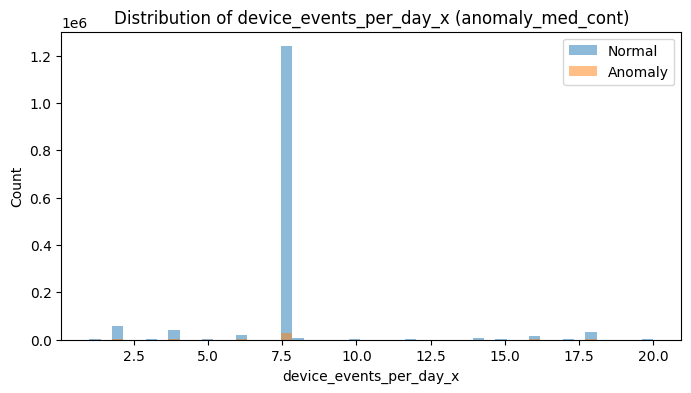

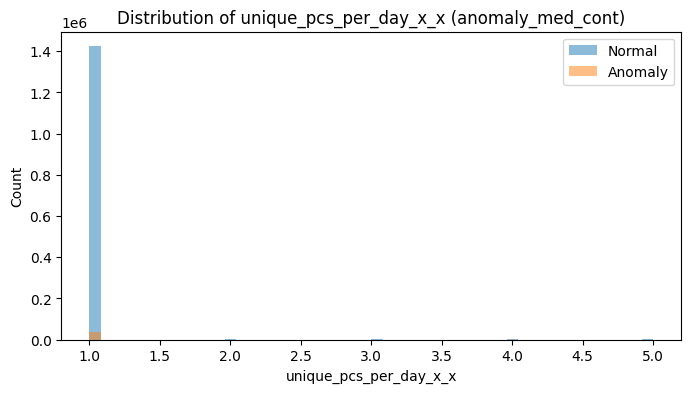

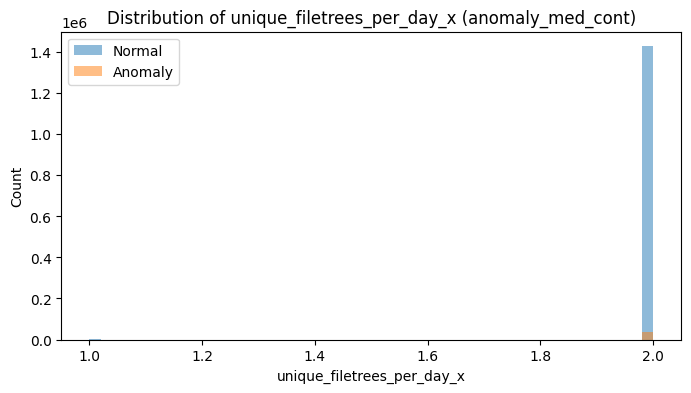

Top 10 anomalous users for anomaly_high_cont:
user
3336    490
1730    473
1069    471
1855    469
182     468
27      464
724     461
623     460
757     442
3937    429
Name: count, dtype: int64
Exported details to top_anomalous_users_anomaly_high_cont.csv


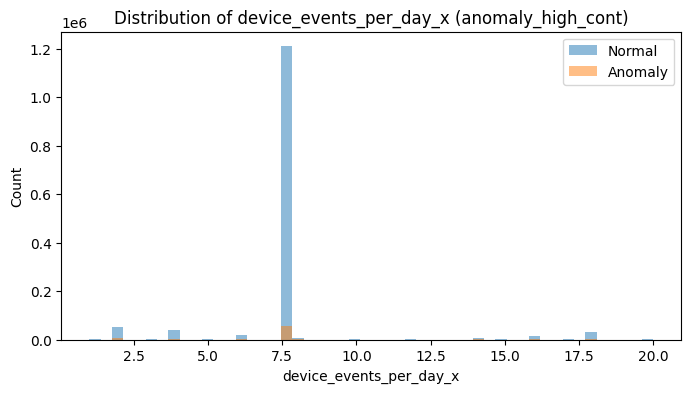

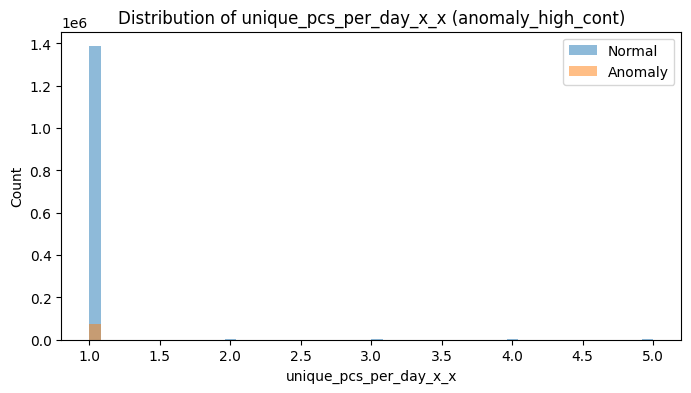

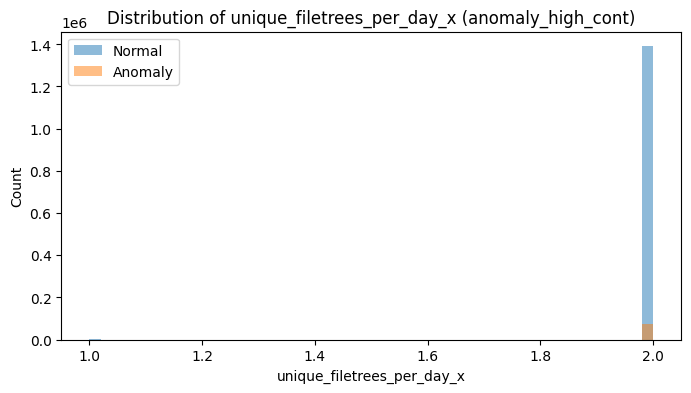

Exported SHAP importances to shap_importances_anomaly.csv


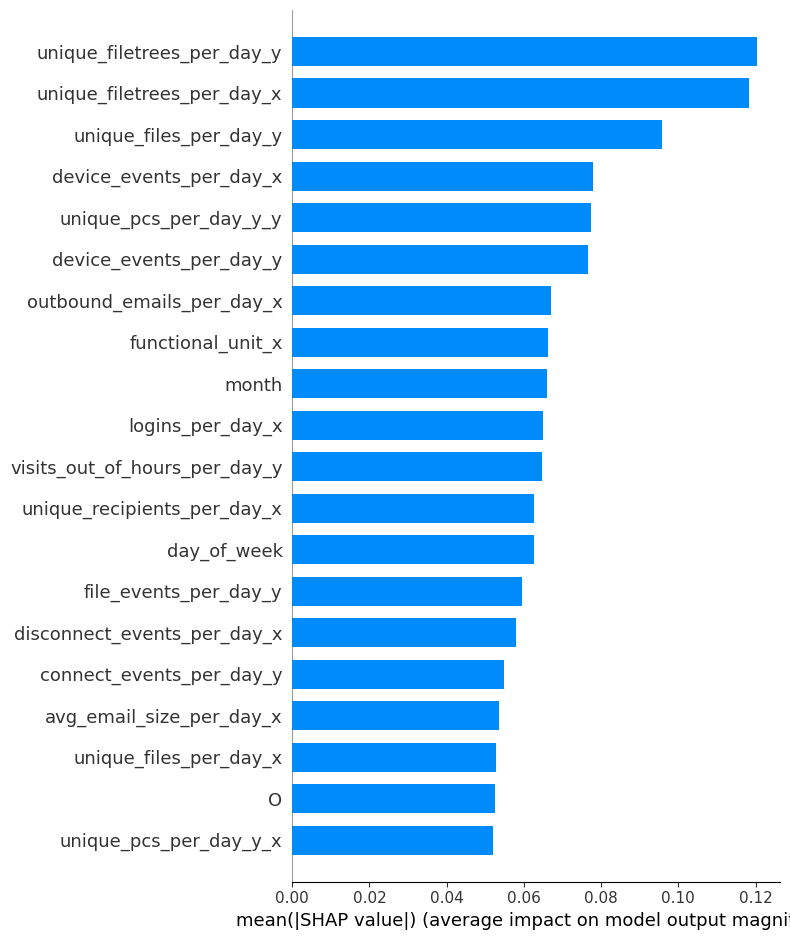

Exported SHAP importances to shap_importances_anomaly_med_cont.csv


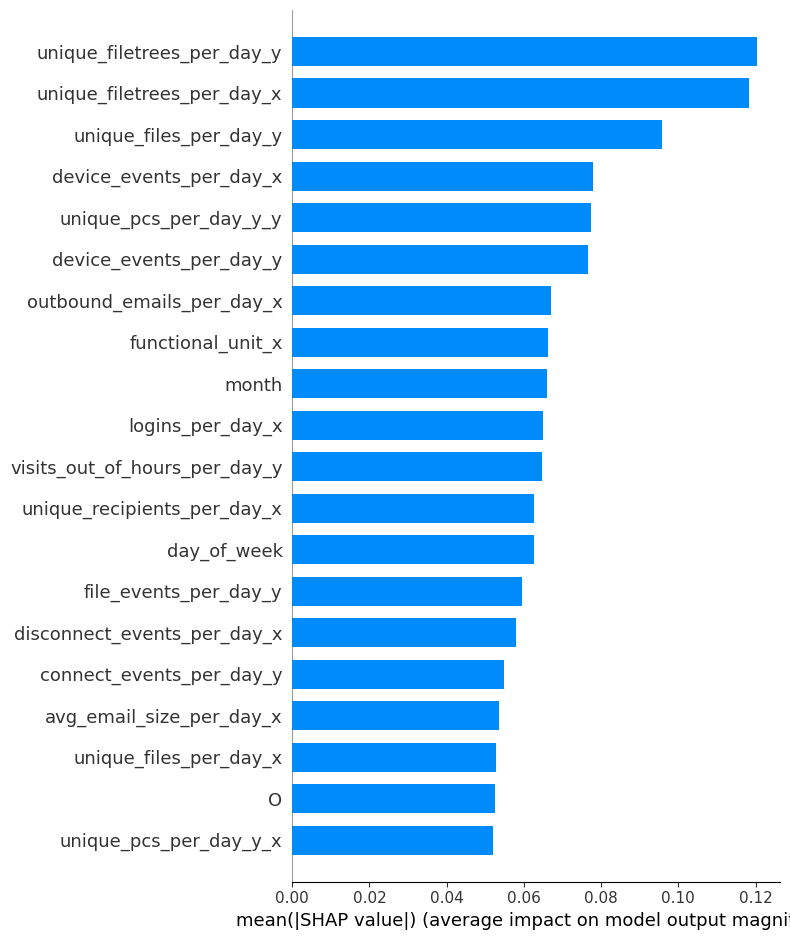

Exported SHAP importances to shap_importances_anomaly_high_cont.csv


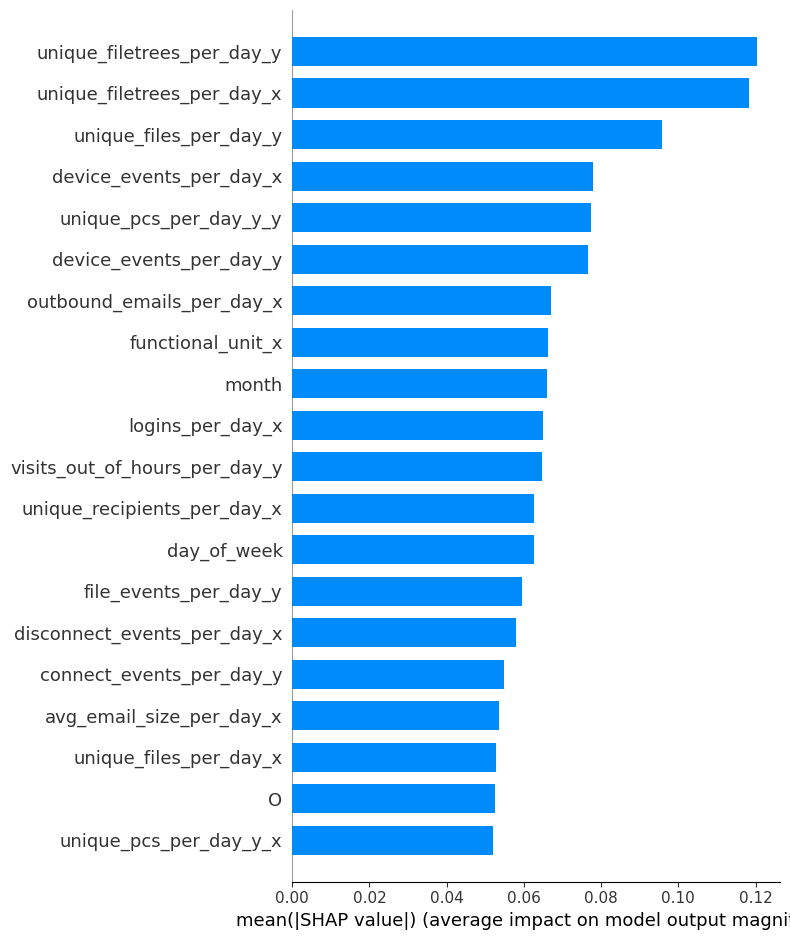

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import IsolationForest

# 1. Load data
df = pd.read_csv(r'C:\Users\karun\OneDrive\Documents\RIK\outputs\final_outputs\isolation_forest_results.csv')

# 2. Helper: Export top anomalous users for each contamination level
def export_top_anomalous_users(df, anomaly_col, top_n=10, out_csv=None):
    top_users = df[df[anomaly_col] == -1]['user'].value_counts().head(top_n)
    print(f"Top {top_n} anomalous users for {anomaly_col}:")
    print(top_users)
    if out_csv:
        df[df['user'].isin(top_users.index) & (df[anomaly_col] == -1)].to_csv(out_csv, index=False)
        print(f"Exported details to {out_csv}")

# 3. Helper: Plot feature distributions for anomalies vs normal
def plot_feature_distribution(df, feature, anomaly_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[df[anomaly_col] == 1][feature], bins=50, alpha=0.5, label='Normal')
    plt.hist(df[df[anomaly_col] == -1][feature], bins=50, alpha=0.5, label='Anomaly')
    plt.legend()
    plt.title(f'Distribution of {feature} ({anomaly_col})')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 4. Helper: Export SHAP importances
def export_shap_importances(features, importances, filename):
    pd.DataFrame({'feature': features, 'mean_abs_shap': importances}).to_csv(filename, index=False)
    print(f"Exported SHAP importances to {filename}")

# 5. Run for each contamination level
contamination_levels = {
    'anomaly': 0.01,
    'anomaly_med_cont': 0.025,
    'anomaly_high_cont': 0.05
}
feature_cols = [col for col in df.columns if col not in ['user', 'anomaly', 'anomaly_med_cont', 'anomaly_high_cont']]

for col, cont in contamination_levels.items():
    if col not in df.columns:
        # Fit model and add anomaly column if missing
        iso = IsolationForest(contamination=cont, random_state=42)
        df[col] = iso.fit_predict(df[feature_cols])
    # Export top anomalous users
    export_top_anomalous_users(df, col, out_csv=f'top_anomalous_users_{col}.csv')
    # Plot distributions for top features
    top_features = feature_cols[:3]  # You can update this list based on SHAP results
    for feat in top_features:
        plot_feature_distribution(df, feat, col)

# 6. SHAP analysis and export
for col, cont in contamination_levels.items():
    X = df[feature_cols]
    iso = IsolationForest(contamination=cont, random_state=42).fit(X)
    explainer = shap.TreeExplainer(iso)
    shap_values = explainer.shap_values(X)
    # Get top features
    mean_abs = np.abs(shap_values).mean(axis=0)
    indices = np.argsort(mean_abs)[::-1][:10]
    features = X.columns[indices]
    importances = mean_abs[indices]
    export_shap_importances(features, importances, f'shap_importances_{col}.csv')
    # SHAP summary plot
    shap.summary_plot(shap_values, X, plot_type="bar", show=True)